Storm Classification Problem

Objective
Given a Dataset classify the storms into hurricanes, typhoons and their sub categories. 
Use Pre defined classes of storms are already given in the dataset as a base for Classification.

In [91]:
#### Package Libraries

 # Math package
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import pandas as pd

### Visualization tools
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph. I like it most for plot


In [92]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
# To import the svm classifier

In [93]:
## Read the data
pacific_data = pd.read_csv('pacific.csv')

In [94]:
pacific_data.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [95]:
pacific_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26137 entries, 0 to 26136
Data columns (total 22 columns):
ID                  26137 non-null object
Name                26137 non-null object
Date                26137 non-null int64
Time                26137 non-null int64
Event               26137 non-null object
Status              26137 non-null object
Latitude            26137 non-null object
Longitude           26137 non-null object
Maximum Wind        26137 non-null int64
Minimum Pressure    26137 non-null int64
Low Wind NE         26137 non-null int64
Low Wind SE         26137 non-null int64
Low Wind SW         26137 non-null int64
Low Wind NW         26137 non-null int64
Moderate Wind NE    26137 non-null int64
Moderate Wind SE    26137 non-null int64
Moderate Wind SW    26137 non-null int64
Moderate Wind NW    26137 non-null int64
High Wind NE        26137 non-null int64
High Wind SE        26137 non-null int64
High Wind SW        26137 non-null int64
High Wind NW        2613

Conversion of Categorical Status Character variables to Discrete Numerics

In [96]:
pacific_data.head()


#### note that the Values for the column "STATUS" is characters

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,TS,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,TS,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,TS,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,TS,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,TS,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [98]:
### our Objective is to classify the storms into multiple classes.
### we will need our values to be categorical to be converted to discrete numerics so that Python and Decision Tree algorithm 
### understands the categories

### pandas .Categorical function is used to convert categorical characters to numerics
pacific_data.Status = pd.Categorical(pacific_data.Status)
pacific_data['Status'] = pacific_data.Status.cat.codes


In [31]:
pacific_data.head()

### note that the status variable has been covented by pandas .Categorical function

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,EP011949,UNNAMED,19490611,0,,11,20.2N,106.3W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,EP011949,UNNAMED,19490611,600,,11,20.2N,106.4W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,EP011949,UNNAMED,19490611,1200,,11,20.2N,106.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,EP011949,UNNAMED,19490611,1800,,11,20.3N,107.7W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,EP011949,UNNAMED,19490612,0,,11,20.4N,108.6W,45,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


Data Exploration through Visualization

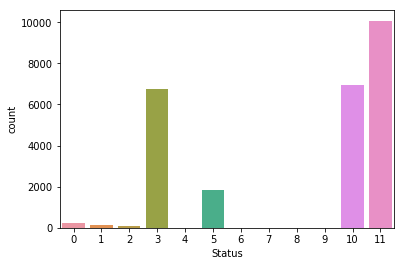

In [99]:
# lets get the frequency of different typhoons
sns.countplot(pacific_data['Status'],label="Count")


### Note that 

DATA WRANGLING
1. Remove insignificant columns

In [33]:
import random

random.seed(2)

### copy the data frame to another data frame called pred_columns
pred_columns = pacific_data[:]

### drop insignificant columns
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['Date'],axis=1,inplace=True)
pred_columns.drop(['Time'],axis=1,inplace=True)



D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
D:\Anaconda3\lib\site-packages\ipykernel_launch

In [101]:
type(pred_columns)

pandas.core.frame.DataFrame

In [100]:
# move the important columns to a new variable
#these are the variables which will use for prediction

prediction_var = pred_columns.columns
print(list(prediction_var))

['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [102]:
type(prediction_var)

pandas.core.indexes.base.Index

In [103]:
#now split our data into train and test. 30% test size
from sklearn.model_selection import train_test_split

train, test = train_test_split(pacific_data, test_size = 0.3)

In [104]:
### check dimensions of train and test dataset
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [105]:
#Create a training data input on independent variables which we created earlier
X_train = train[prediction_var]

### create a train data input on dependent variable 
y_train= train['Status']



In [106]:
### look at the columns of our training dataset

print(list(train.columns))

['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude', 'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [107]:
#Create a Test data input on independent variables which we created earlier
X_test= test[prediction_var]
#
y_test =test['Status']  

In [110]:
### fit the DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

In [111]:
#Decision Tree
dt_model = DecisionTreeClassifier()

# now fit our model for traiing data
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

PREDICTION AND EVALUATION

In [112]:
predictions = dt_model.predict(X_test)

In [114]:
### comparing predicted vs actual values
from sklearn.metrics import accuracy_score

#
df = pd.DataFrame(predictions, y_test)
print(df)

         0
Status    
10      10
5        5
11      11
10      10
11      11
11      11
11      11
3        3
10      10
11      11
10      10
11      11
5        5
10      10
11      11
11      11
11      11
10      10
3        3
5        5
3        3
10      10
3        3
11      11
5        5
3        3
3        3
10      10
11      11
1       11
...     ..
10      10
3        3
11      11
5        5
10      10
10      10
10      10
5        5
10      10
11      11
11       5
3        3
11      11
11      11
11      11
11      11
10      10
10      10
3        3
3        3
3        3
10      10
11      11
11      11
11      11
11      11
11      11
11      11
3        3
11      11

[7842 rows x 1 columns]


In [115]:
### to check accuracy
dt_model_metrics = accuracy_score(predictions,y_test)

#
dt_model_metrics 

### Decision Tree based model gives 96% accuracy

0.9538383065544503

In [72]:
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.33      0.02      0.03        65
          1       0.00      0.00      0.00        40
          2       0.67      0.19      0.30        31
          3       1.00      1.00      1.00      2017
          5       0.74      0.82      0.78       541
          6       0.00      0.00      0.00         3
          7       0.00      0.00      0.00         1
          8       0.00      0.00      0.00         2
          9       1.00      1.00      1.00         1
         10       0.94      0.96      0.95      2125
         11       0.99      1.00      0.99      3016

avg / total       0.95      0.96      0.95      7842



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
print(confusion_matrix(y_test,predictions))

[[   1    0    0    0   59    0    0    0    0    5    0]
 [   0    0    0    0    0    0    0    0    0   33    7]
 [   0    0    6    1    2    0    0    0    0   16    6]
 [   0    0    0 2017    0    0    0    0    0    0    0]
 [   2    0    0    0  444    0    0    0    0   83   12]
 [   0    0    0    0    0    0    0    0    0    1    2]
 [   0    0    0    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    1    0    0]
 [   0    0    3    0   83    0    0    0    0 2039    0]
 [   0    0    0    0    7    0    0    5    0    0 3004]]


In [ ]:
#RandomForest classifier





In [121]:
# a simple random forest model
### n_estimators - no of trees.
rf_model=RandomForestClassifier(n_estimators=500)



In [122]:
# now fit our model for traiing data
rf_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [123]:
rf_prediction=rf_model.predict(X_test)# predict for the test data

In [124]:
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(accuracy_score(rf_prediction,y_test)) # to check the accuracy

# here we will use accuracy measurement between our predicted value and our test output values

0.9554960469268043


Tree Visualization
Scikit learn actually has some built-in visualization capabilities for decision trees, 
you won't use this often and it requires you to install the pydot library, 
but here is an example of what it looks like and the code to execute this:

from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot


features =  list(pred_columns.columns[:])
features

In [80]:
dot_data = StringIO()  
export_graphviz(dt_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

NameError: name 'pydot' is not defined